[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.ornl.gov/tutorials/imaging-notebooks/venus_monitor_hdf5/)

<img src='__docs/__all/notebook_rules.png'/>

# Select Your IPTS 

In [1]:
from __code import system
from __code.venus_display_metadata_from_hdf5.main import VenusDisplayMetadataFromHdf5

import h5py
import numpy as np

system.System.select_working_dir(facility='SNS', instrument='VENUS')
from __code.__all import custom_style
custom_style.style()

import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
%matplotlib inline

# Select NeXus Files

After selecting all the NeXus you want to use, the metadata will be automatically displayed.

In [ ]:
o_event = VenusDisplayMetadataFromHdf5(working_dir=system.System.get_working_dir())
o_event.select_event_nexus()

In [7]:

nexus = "/SNS/VENUS/IPTS-34969/nexus/VENUS_6674.nxs.h5"
import os
assert os.path.exists(nexus)

import h5py

In [27]:
list_pvs = {'daq rate': ['entry', 'DASlogs', 'BL10:Det:BM1:Histo:Daq:Rate'],
            'event_rate_rbv': ['entry', 'DASlogs', 'BL10:Det:M1:Det1:EventRate_RBV'],
            'count_rate': ['entry', 'DASlogs', 'BL10:Det:T1:CountRate_RBV'],
            'pel_evt_rate': ['entry', 'DASlogs', 'BL10:CS:tpx3:cam1:PelEvtRate_RBV'],
            }

In [28]:
def value_of_pv_path(h5file, list_pv_path):
  
    with h5py.File(h5file, 'r') as nxs:
        for _path_entry in list_pv_path:
            nxs = nxs[_path_entry]
        return nxs['value'][:]
                            


In [32]:
print(value_of_pv_path("/SNS/VENUS/IPTS-34969/nexus/VENUS_6675.nxs.h5", list_pvs['pel_evt_rate']))

[3562108 3512246 3569266 3573021 3595969 3589580 3557921 3545896 3569078
 3558657 3549097 3515250 3579098 3550488 3556722 3551524 3546540 3570339
 3563663 3571882 3547758 3496587 3557873 3578937 3564126 3563938 3546467
 3543671 3528384 3530209 3534523 3451809 3531600 3511505]


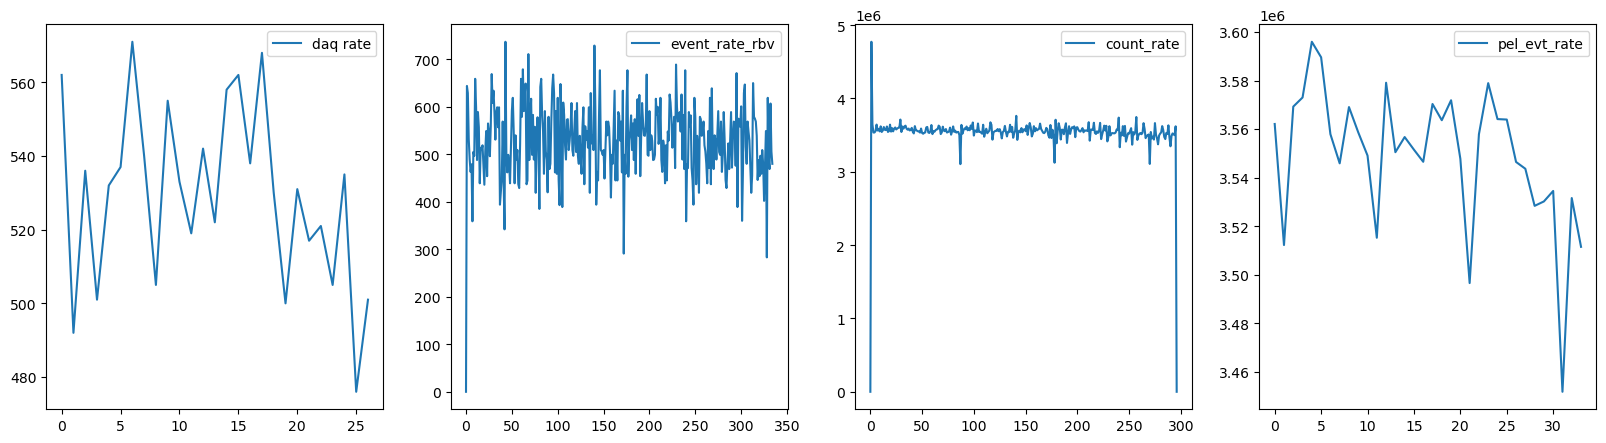

In [39]:


import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,5))

data = {key: value_of_pv_path("/SNS/VENUS/IPTS-34969/nexus/VENUS_6675.nxs.h5", list_pvs[key]) for key in list_pvs.keys()}
for _index, _key in enumerate(data.keys()):
    ax[_index].plot(data[_key], label=_key)
    ax[_index].legend()